# Introduction to clustering

Cluster analysis or clustering is part of the larger field of machine learning and is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).  

It is a main task of exploratory data analysis, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.  

Clustering itself is not one specific algorithm, but the general task to be solved. It can be achieved by various algorithms that differ significantly in their understanding of what constitutes a cluster and how to efficiently find them

Popular notions of clusters include:
* Groups with small distances between cluster members
* Dense areas of the data space, intervals or particular statistical distributions.

**Clustering can therefore be formulated as a multi-objective optimization problem**

## Datasets

In [67]:
import pandas as pd
import plotly_express as px
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

In [235]:
features, true_labels = make_blobs(n_samples=50, centers=4, cluster_std=1.5, random_state=42)
blobs_df = pd.DataFrame([[x, y, l] for (x,y),l in zip(features, true_labels)], columns=['x','y','label'])
blobs_df.label = blobs_df.label.astype(str)

In [241]:
blobs_df

,x,y,label
0,-3.411758,11.792703,0
1,4.953174,-0.966336,1
2,2.422096,0.893403,1
3,-10.809245,-5.647256,2
4,-3.871234,6.895831,0
5,-0.310724,8.675622,0
6,-3.325772,9.180670,0
7,4.619633,0.386603,1
8,6.186378,3.370090,1
9,-9.891407,6.832030,3


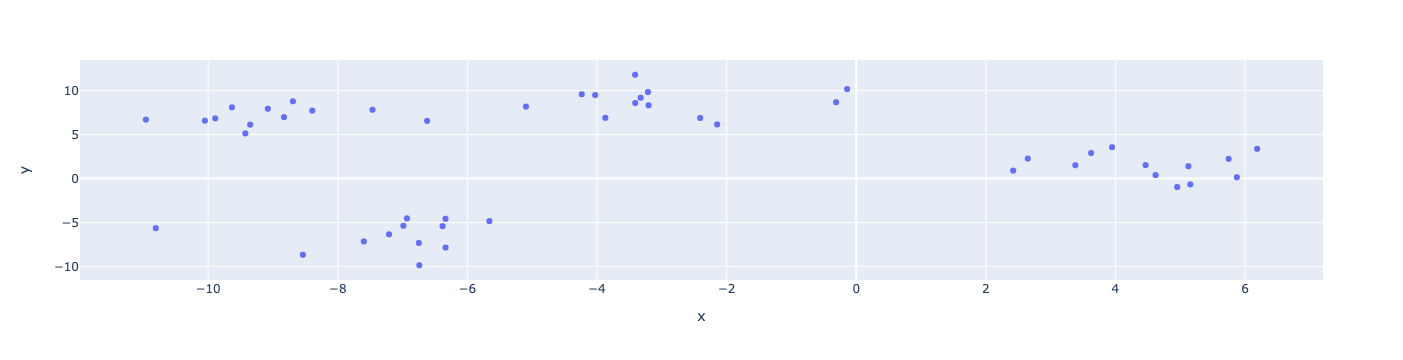

In [236]:
px.scatter(blobs_df, x='x', y='y')

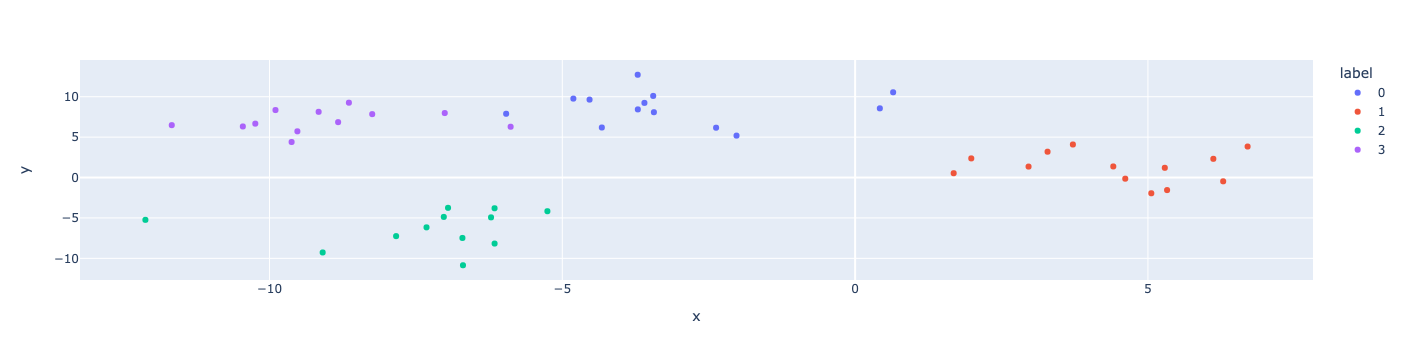

In [234]:
px.scatter(blobs_df, x='x', y='y', color='label')

In [238]:
features, true_labels = make_moons(n_samples=200, noise=0.2, random_state=42)
moons_df = pd.DataFrame([[x, y, l] for (x,y),l in zip(features, true_labels)], columns=['x','y','label'])
moons_df.label = moons_df.label.astype(str)

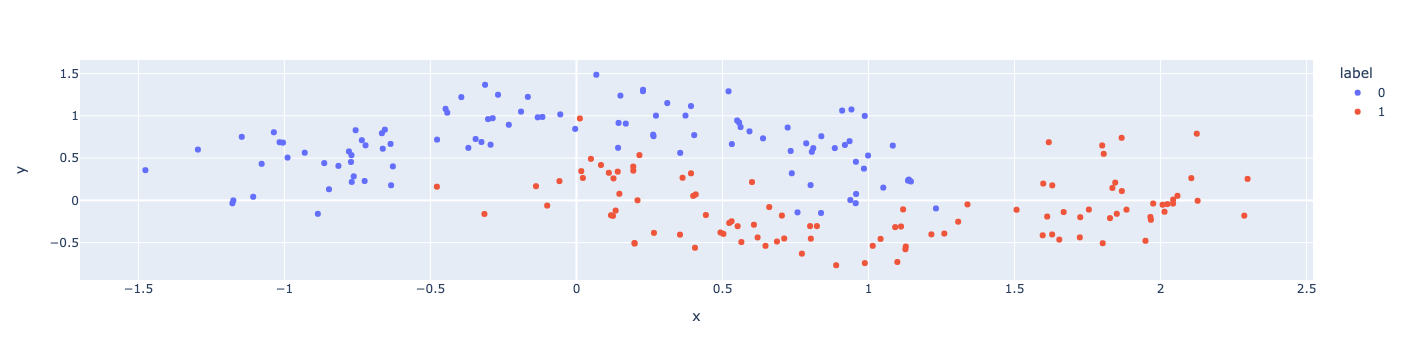

In [240]:
px.scatter(moons_df, x='x', y='y', color='label')

## Types of clustering algorithms

You can perform clustering using many different approaches—so many, in fact, that there are entire categories of clustering algorithms. Each of these categories has its own unique strengths and weaknesses. This means that certain clustering algorithms will result in more natural cluster assignments depending on the input data.



* Connectivity-based clustering (hierarchical clustering)
* Centroid-based clustering
* Distribution-based clustering
* Density-based clustering

## Centroid based algorithms

In [73]:
from IPython.display import YouTubeVideo

### K-Means algorithm

K-means clustering is an iterative clustering technique which assumes there are K distinct clusters in the data. The algorithm start with random K cluster centers, dentoted as **centroids**, and in each iteration, preforms two tasks:
1. Assign each data point to its nearest centroid (the expectation step)
2. Computes the mean of all the points for each cluster and sets the new centroid (the Maximization step)

The process is then repeated until the K cluster centroids do not change. 

![alt](https://files.realpython.com/media/kmeans-algorithm.a94498a7ecd2.png)

#### Measuring the K-means performance

The quality of the cluster assignments is determined by computing the  total variation within clusters by computing sum of the squared error (SSE) after the centroids converge. The SSE is defined as the sum of the squared Euclidean distances of each point to its assigned centroid:

* Comupute the square distance of each point to **it assigned cluster centroid**
* Sum all squared distances

Since this is a measure of error, the objective of k-means is to try to minimize this value.

#### k-means sklearn implementation

In [226]:
from sklearn.cluster import KMeans

In [242]:
kmeans = KMeans(2, n_init=10)
identified_clusters = kmeans.fit_predict(blobs_df[['x','y']])
blobs_df['cluster_id'] = identified_clusters
blobs_df.cluster_id = blobs_df.cluster_id.astype(str)

In [246]:
kmeans.cluster_centers_

array([[-5.88811288,  7.95518241],
       [-1.12535537, -2.36308922]])

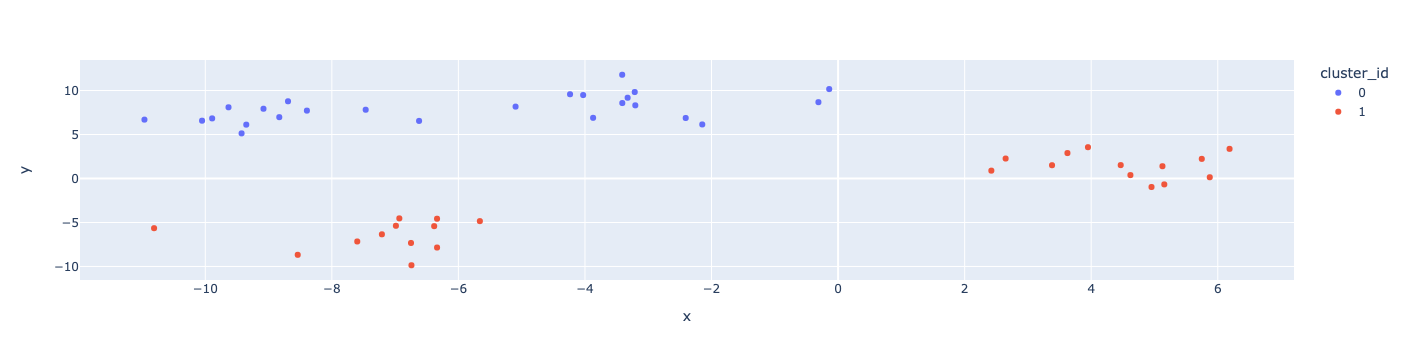

In [245]:
px.scatter(blobs_df, x='x', y='y', color='cluster_id')

<div class="alert alert-block alert-warning">
<b>Question: Compute the resulted total variation within each cluster</b>
</div>

In [143]:
kmeans = KMeans(3,  n_init=10)
identified_clusters = kmeans.fit_predict(blobs_df[['x','y']])
blobs_df['cluster_id'] = identified_clusters
blobs_df.cluster_id = blobs_df.cluster_id.astype(str)

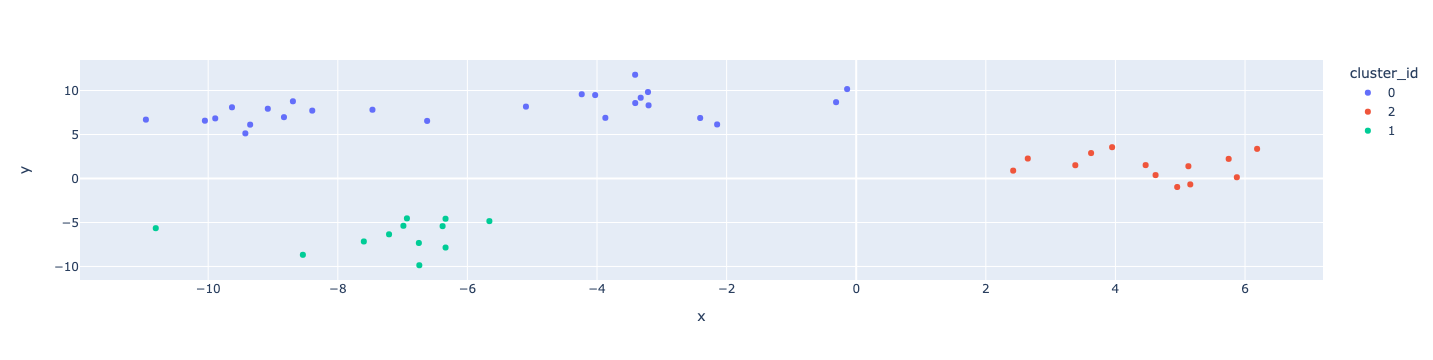

In [144]:
px.scatter(blobs_df, x='x', y='y', color='cluster_id')

<div class="alert alert-block alert-warning">
<b>Question: Compute the resulted total variation within each cluster. Is it bigger/smaller from the total variation for when K=2?</b>
</div>

#### K-Means - the search for a proper K

The above algorithm assums the correct number of clusters in knwon in advance. This is usually not the case. Note that if the number of clusters equals the number of points, the total varation would reach an absolut minimum of 0, becasue each datapoint will be its own cluster. This is a general rule - The total variation will decrease as K increase, which means we can't select K by the value the brings the total variation to the minimum.

What we can do, though, is look at the decrease of the variation as we move from k=1 to k=n, and select the k that decrease the varation the most:

In [247]:
kmeans.inertia_

1656.5682358478214

In [228]:
from scipy.spatial.distance import euclidean
variation = []
for k in range(1, 10):
    kmeans = KMeans(k)
    identified_clusters = kmeans.fit_predict(blobs_df[['x','y']])
    variation.append((k, kmeans.inertia_))                                                                                                  
variation_df = pd.DataFrame(variation, columns=['k','total_variation'])    
variation_df['variation_diff'] = variation_df.total_variation.diff()

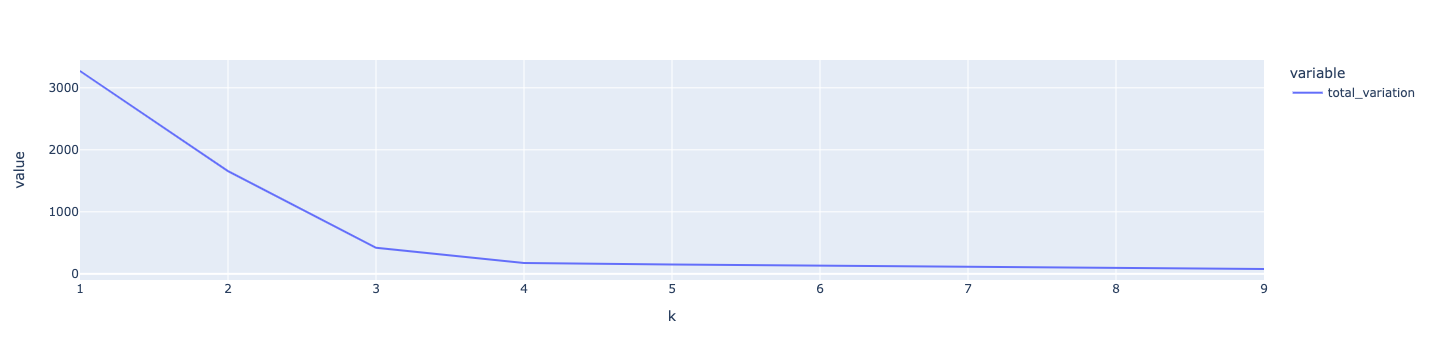

In [229]:
px.line(variation_df, x='k',y=['total_variation'])

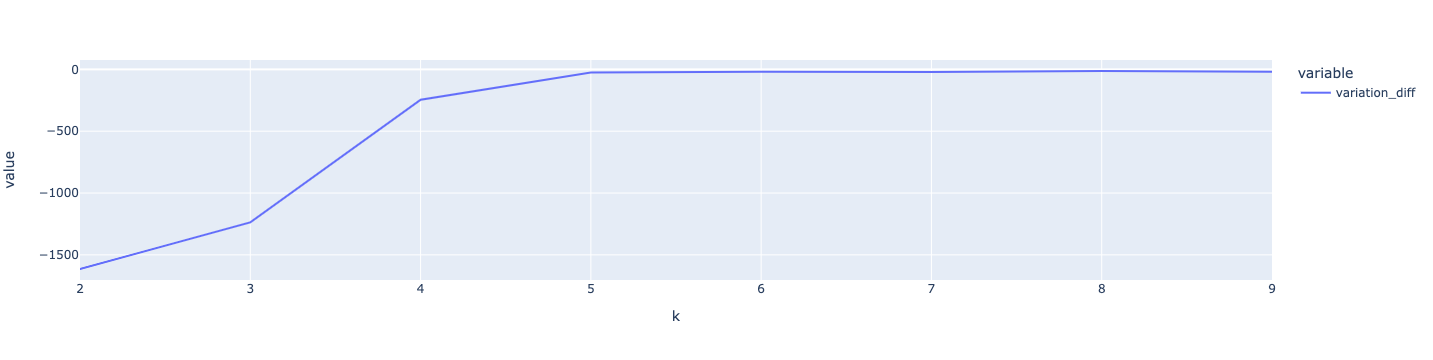

In [230]:
px.line(variation_df[1:], x='k',y=['variation_diff'])

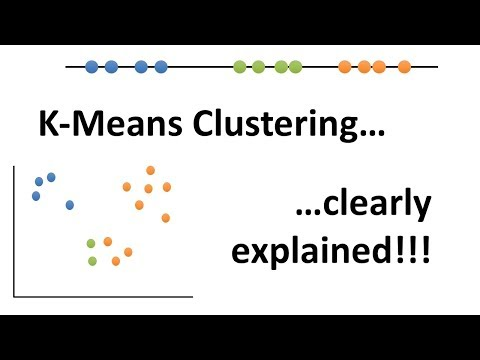

In [76]:
YouTubeVideo('4b5d3muPQmA', width=800, height=300)

#### K-mean self-implementation

<div class="alert alert-block alert-warning">
<b>Implement KMeans algorithm by yourself</b>
</div>

## Connectivity-based clustering (Hierarchical clustering)

### Theory of Hierarchical Clustering

There are two types of hierarchical clustering: 
* Agglomerative  - data points are clustered using a bottom-up approach starting with individual data points
* Divisive - top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters

We will focus on agglomerative clustering that involves the bottom-up approach.

### Hierarchical Clustering - Algorithm


Following are the steps involved in agglomerative clustering:

1. At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be the number of data points.
2. Form a cluster by joining the two closest data points resulting in K-1 clusters.
3. Form more clusters by joining the two closest clusters resulting in K-2 clusters.
4. Repeat the above three steps until one big cluster is formed.
5. Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem. We will study the concept of dendrogram in detail in an upcoming section.

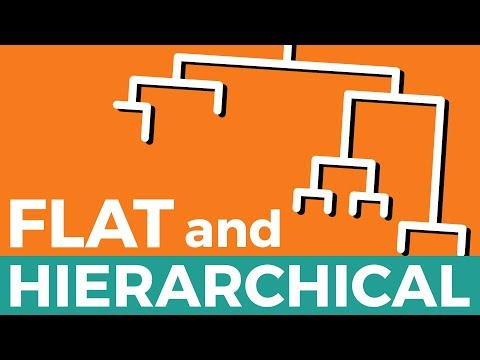

In [74]:
YouTubeVideo('ijUMKMC4f9I', width=800, height=300)

In [216]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt


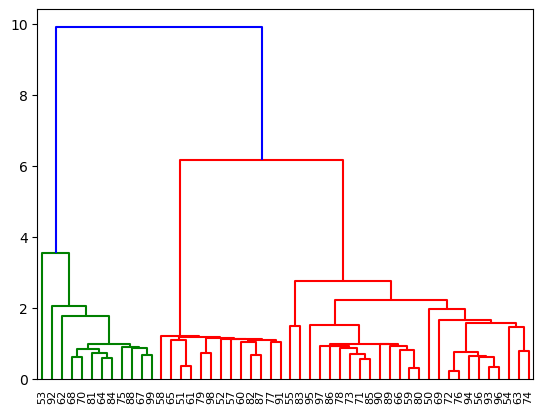

In [222]:
linked = linkage(blobs_df[['x','y']], 'single')
d_matrix = dendrogram(linked, orientation='top', labels=range(100), distance_sort='descending', show_leaf_counts=True)
plt.show()

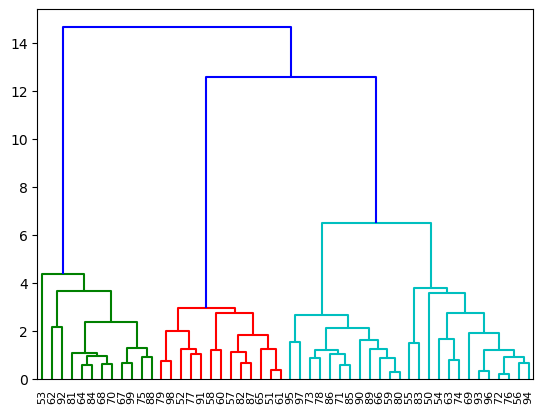

In [221]:
linked = linkage(blobs_df[['x','y']], 'average')
d_matrix = dendrogram(linked, orientation='top', labels=range(100), distance_sort='descending', show_leaf_counts=True)
plt.show()

In [225]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
cluster.fit_predict(blobs_df[['x','y']])

array([1, 2, 2, 0, 1, 1, 1, 2, 2, 3, 2, 2, 0, 1, 0, 2, 3, 0, 0, 1, 0, 3,
       1, 3, 1, 0, 1, 2, 3, 2, 3, 0, 2, 1, 0, 3, 3, 2, 0, 3, 3, 2, 0, 1,
       1, 3, 1, 3, 2, 0])

## Evaluating Clustering Performance